
Task 1: 

Visually Exploring a Data Set for a Car sales platform


Student: Seyyed Farhad Torabi

Professor: Dr.Christian Müller-Kett




Introduction



Large-scale data projects begin with exploratory analysis. Understanding our data structure is key to make progress. When capturing data's location and variability, one may use the central tendency and its spread. Following are mathematical definitions and illustrations of exploratory data analysis metrics. We'll also look at several visuals for visualizing datasets and provide Python examples. Covariance and correlation are two interesting measures used to analyse the association between two variables. In our situation, EDA was implemented in python.
1) How should we evaluate this company's function? If we assume this project is for a car sale agency, then after examining their business, we will conclude that since they buy cars for trading and sell them to customers with added profit, the car's price should be determined in a way that does not harm the agency, and this price is both the most profitable for the agency and the market price. The optimal car pricing can be forecasted using historical data from the automotive market based on the time period and vehicle specs.
2) Understand data (EDA) Exploratory data analysis is a statistical strategy that uses visual tools to summarize data sets. Using a statistical model is possible, but the main purpose is to understand what the data can tell us that formal modelling or hypothesis testing cannot.


the folowing cells are python codes for EDA and the rest of the project.





# System Use Case Model 

We used pandas library for define dataset's behavior. Mean, median, and mode are used for symmetric data distributions but different for skewed ones. Variance and standard deviation are common metrics of variability so in this case we used them to find car price distribution. Univariate and bivariate were used to make a better understanding of data. For numerical features we used Box plot to show the interquartile range, median, and outliers. Integrating a distribution across the variable's values calculates the probability that a random variable will fall inside a specific range. Violin graphs include the underlying probability density function, improving box plots. Histogram are used for splitting data into intervals (or "bins") with a particular width. In bivariate Analysis we used scatter plot for comparing multiple features to understand the relations. Covariance and correlation assess two random variables relationship we show them in a hit map form. 

# Data Understanding 


In [1]:
#importing necessary librereis

In [1]:
import pandas as pd 
import datetime as dt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import missingno as msnum 
from pandas_profiling import ProfileReport
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)
import prince
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error


1- Read Data with pandas from dataset

In [2]:
df=pd.read_excel(r'D:\Car Price.xlsx')

In [3]:
#we should sort the data with date because analysis are time based.

In [22]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date'],format='DD/MM/YYYY')

In [6]:
df = df.sort_values(by=["Date"])


In [7]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [8]:
data=df.drop(['Date'],axis=1)

2- Basics Descriptive Statistics (Min, Max, Mod, ...)


In [9]:
data.shape

(170989, 11)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170989 entries, 123921 to 106024
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              170989 non-null  float64
 1   Company         170989 non-null  object 
 2   Model           170989 non-null  object 
 3   Detail          170989 non-null  object 
 4   ProductionYear  170989 non-null  float64
 5   Mileage         170989 non-null  float64
 6   BodyCondition   170989 non-null  float64
 7   Price           170989 non-null  float64
 8   Year            170989 non-null  int64  
 9   Month           170989 non-null  int64  
 10  Day             170989 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 15.7+ MB


In [11]:
data.describe()

ID  ProductionYear        Mileage  BodyCondition  \
count  170989.000000   170989.000000  170989.000000  170989.000000   
mean    85495.000000     1426.434788   50562.379159       2.262385   
std     49360.416927      152.494964   72097.194357       3.381562   
min         1.000000       40.000000      -5.000000       1.000000   
25%     42748.000000     1386.000000       0.000000       1.000000   
50%     85495.000000     1388.000000   23000.000000       1.000000   
75%    128242.000000     1389.000000   75000.000000       1.000000   
max    170989.000000     2008.000000  990000.000000      18.000000   

              Price           Year          Month            Day  
count  1.709890e+05  170989.000000  170989.000000  170989.000000  
mean   1.216382e+07    2010.739533       6.187755      15.095445  
std    1.813027e+07       0.677241       3.534542       9.050238  
min    0.000000e+00    2010.000000       1.000000       1.000000  
25%    0.000000e+00    2010.000000       3.000000       7.000000  
50%    8.436972e+06    2011.000000       6.000000      15.000000  
75%    1.468658e+07    2011.000000       9.000000      23.000000  
max    6.249609e+08    2012.000000      12.000000      31.000000

In [12]:
#Missing values check - Boolean 
 
data.isnull().any()

ID                False
Company           False
Model             False
Detail            False
ProductionYear    False
Mileage           False
BodyCondition     False
Price             False
Year              False
Month             False
Day               False
dtype: bool

In [13]:
#count of missing values
 
data.isnull().sum()

ID                0
Company           0
Model             0
Detail            0
ProductionYear    0
Mileage           0
BodyCondition     0
Price             0
Year              0
Month             0
Day               0
dtype: int64

In [14]:
data.mode()

ID Company Model Detail  ProductionYear  Mileage  BodyCondition  \
0            1.0     C-4  M-12    D-7          1389.0      0.0            1.0   
1            2.0     NaN   NaN    NaN             NaN      NaN            NaN   
2            3.0     NaN   NaN    NaN             NaN      NaN            NaN   
3            4.0     NaN   NaN    NaN             NaN      NaN            NaN   
4            5.0     NaN   NaN    NaN             NaN      NaN            NaN   
...          ...     ...   ...    ...             ...      ...            ...   
170984  170985.0     NaN   NaN    NaN             NaN      NaN            NaN   
170985  170986.0     NaN   NaN    NaN             NaN      NaN            NaN   
170986  170987.0     NaN   NaN    NaN             NaN      NaN            NaN   
170987  170988.0     NaN   NaN    NaN             NaN      NaN            NaN   
170988  170989.0     NaN   NaN    NaN             NaN      NaN            NaN   

        Price    Year  Month  Day  
0         0.0  2011.0    1.0  4.0  
1         NaN     NaN    NaN  NaN  
2         NaN     NaN    NaN  NaN  
3         NaN     NaN    NaN  NaN  
4         NaN     NaN    NaN  NaN  
...       ...     ...    ...  ...  
170984    NaN     NaN    NaN  NaN  
170985    NaN     NaN    NaN  NaN  
170986    NaN     NaN    NaN  NaN  
170987    NaN     NaN    NaN  NaN  
170988    NaN     NaN    NaN  NaN  

[170989 rows x 11 columns]

In [15]:
# we can see that some of the columns are categorical so we need to convert them to numerical data to use in meachine learning.
# in this step we can guess the relevent and irelevent features to the problem but not precisly.


3- Missing Value Visualization


<AxesSubplot:>

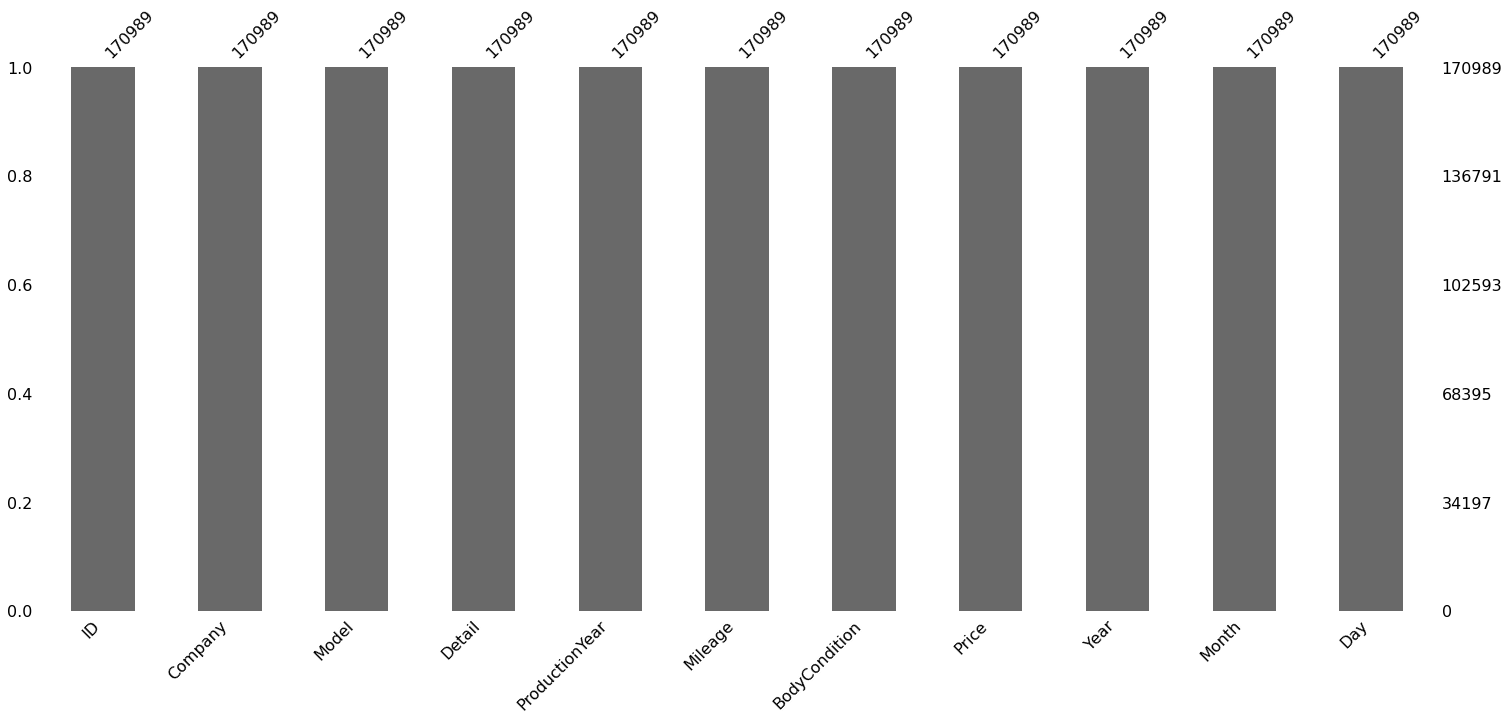

In [16]:
msnum.bar(data)


c:\users\f_pc\miniconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\users\f_pc\miniconda3\lib\site-packages\seaborn\matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<AxesSubplot:>

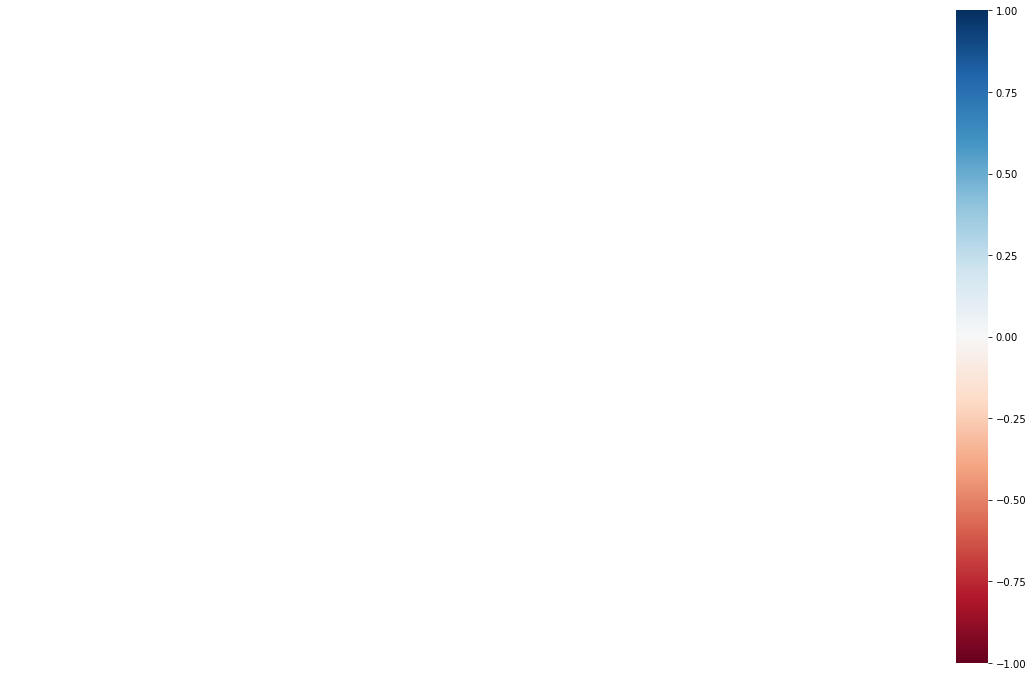

In [17]:
msnum.heatmap(data)


<AxesSubplot:>

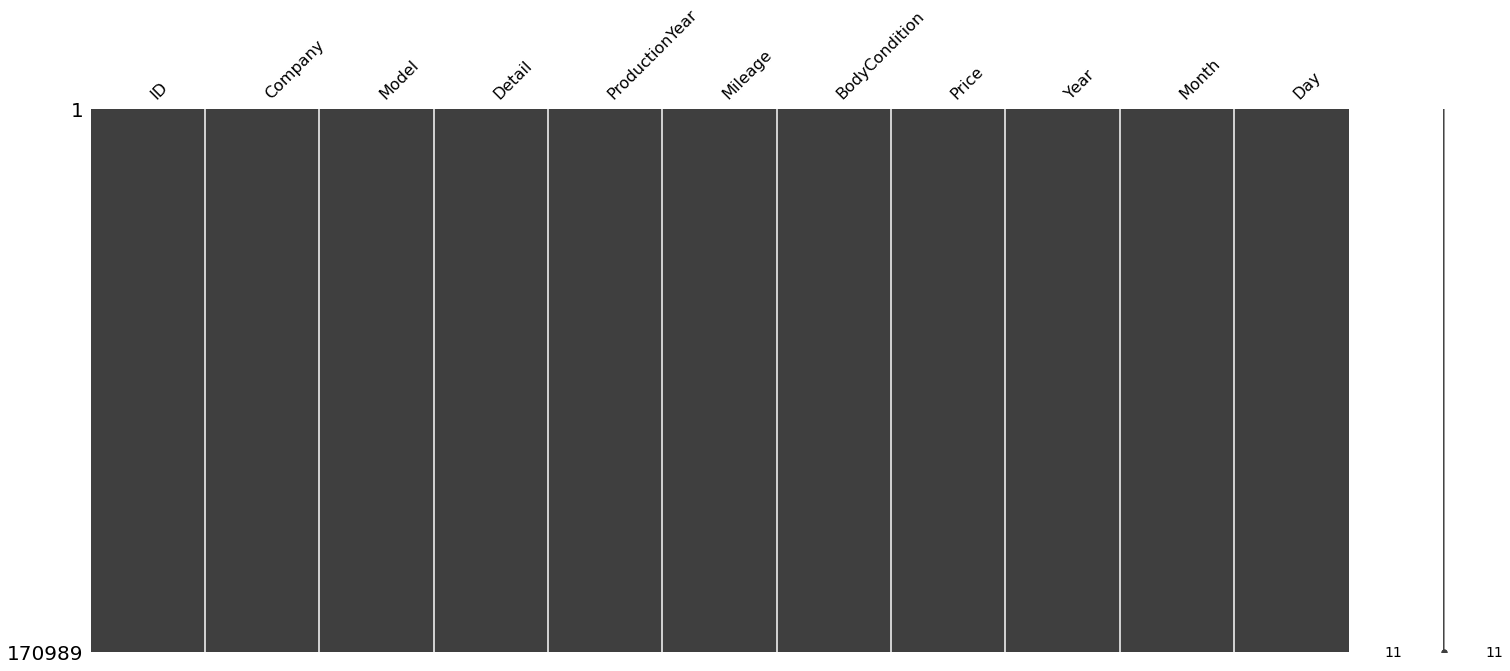

In [18]:
msnum.matrix(data)

In [19]:
# it shows that we have no missing values

4- Graphical Representation

In [20]:
#the ProfileReport library gives us a lot of knowledge about the data set.

In [21]:
ProfileReport(data, title="Pandas Profiling Report", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

4-1- Univariate Analysis (Frequency Distribution, Bar, Pie, ...)


A histogram is a plot of the frequency distribution of numeric array by splitting it to small equal-sized bins

c:\users\f_pc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

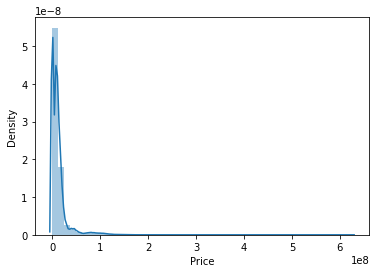

In [33]:
sb.distplot(data['Price'],kde=True) 

In [ ]:
# above plot shows that most of our price data are in a same range but we have some outliers

c:\users\f_pc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

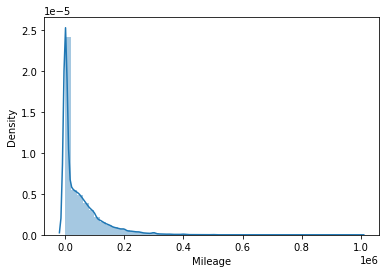

In [17]:
sb.distplot(data['Mileage'],kde=True) 

In [ ]:
# above plot shows that most of our Mileage data are not  in a same range so scaling the data can help us to have a normal
# distribution

c:\users\f_pc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BodyCondition', ylabel='Density'>

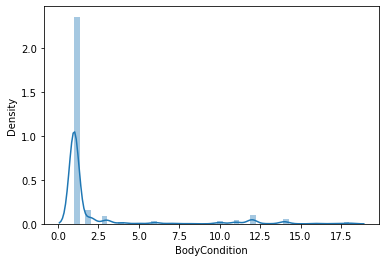

In [18]:
sb.distplot(data['BodyCondition'],kde=True) 

In [ ]:
# above plot shows that most of our BodyCondition data are not in a same range and we have outliers

c:\users\f_pc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ProductionYear', ylabel='Density'>

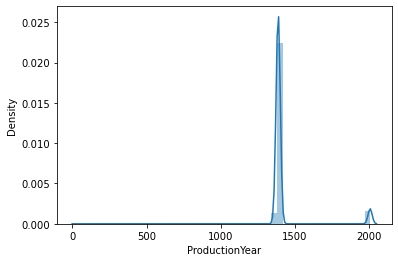

In [19]:
sb.distplot(data['ProductionYear'],kde=True) 

In [ ]:
# above plot shows that most of our price data are in a same range but we have some outliers

<AxesSubplot:ylabel='Company'>

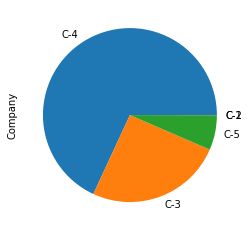

In [20]:
data['Company'].value_counts().plot(kind='pie')

In [ ]:
# because this data is categorical by using pie plot we can have a good intuition about the data

4-2- Bivariate Analysis (Scatter, Linear Correlation, Chi-square Test, Z-test and t-test, ANOVA, ...)


c:\users\f_pc\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

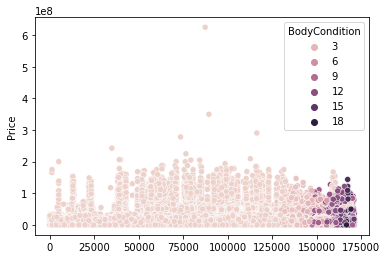

In [34]:
sb.scatterplot(data.index,data['Price'],hue=data['BodyCondition'])

In [ ]:
# in this case with scatterplot we understand the distribution of the price data in the range 
# of bodycondition so it can helps us to know that what kind of cars are the most sale in our time period 
# so we can find the market trend.

c:\users\f_pc\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

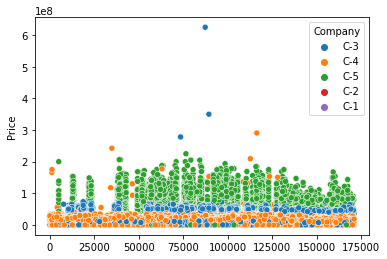

In [35]:
sb.scatterplot(data.index,data['Price'],hue=data['Company'])

In [ ]:
# this scatterplot shows us the trend company in car market.

c:\users\f_pc\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

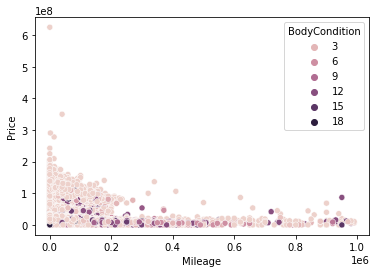

In [9]:
sb.scatterplot(data['Mileage'],data['Price'],hue=data['BodyCondition'])

In [ ]:
# with this plot we uderstand which Mileage and bodycondition is the most populare car.

c:\users\f_pc\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

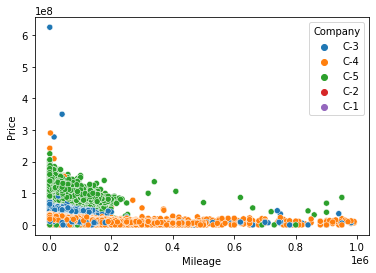

In [10]:
sb.scatterplot(data['Mileage'],data['Price'],hue=data['Company'])

In [ ]:
# in this case the plot shows us which brand is populare and maybe with the mileage partitions we can conclude which brand 
# is Resistant to depreciation.

c:\users\f_pc\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BodyCondition', ylabel='Price'>

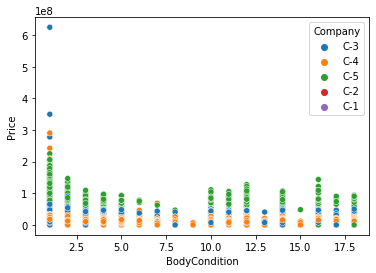

In [11]:
sb.scatterplot(data['BodyCondition'],data['Price'],hue=data['Company'])

In [ ]:
# in this case the plot shows us which brand is populare and maybe with the bodycondition partitions we can conclude which brand 
# is Resistant to depreciation.

In [46]:
cor=data.corr()

<AxesSubplot:>

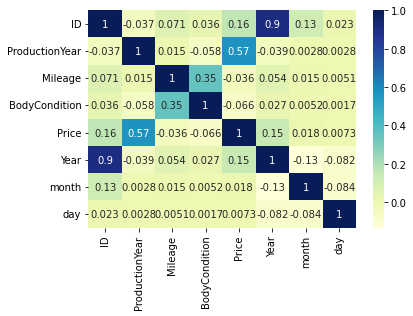

In [47]:
sb.heatmap(cor,cmap="YlGnBu",annot=True)

In [ ]:
# as we saw in the ProfileReport the correlation can helps us in many cases such as Dimensionality reduction or we understand 
# wich features have the most effect on our terget so it can helps us in machine learning.

Chi-Square Test

It is used to decide whether there is a relationship exists between two variables of a population. Useful when analyzing survey results of 2 categorical variables.

H₀: The two categorical variables have no relationship
H₁: There is a relationship between two categorical variables
The number of degrees of freedom of the χ2 independence test statistics:
d.f. = (# rows -1) *(#columns-1)

in Chi test we should first draw a Contingency Table  with scipy library and we should have a significant value alpha 
that is the criticalvalue for rejecting the hypothesis.
after finding p-value that is the rejection zone we should compare p-value with alpha.

If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

we can use scipy to find p-vale:
stat, p, dof, expected = chi2_contingency(table)

In [38]:
# in our case becouse the target is price and it is numerical and the categorical values such as Company,
# Model,Detail and ProductionYear has very low correlation as we will show later so we do not need to use 
# chi-square test

Z-test and T-test

z  tests are a statistical way of testing a hypothesis when either:

We know the population variance, or
We do not know the population variance but our sample size is large n ≥ 30
If we have a sample size of less than 30 and do not know the population variance, then we must use a t-test

We perform the One-Sample Z test when we want to compare a sample mean with the population mean

We perform a Two Sample Z test when we want to compare the mean of two samples

We perform a One-Sample t-test when we want to compare a sample mean with the population mean. The difference from the Z Test is that we do not have the information on Population Variance here

ANOVA TEST

ne-way ANOVA (also known as “analysis of variance”) is a test that is used to find out whether there exists a statistically significant difference between the mean values of more than one group.

A one-way ANOVA has the below given null and alternative hypotheses:

H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)

H1 (null hypothesis): It states that there will be at least one population mean that differs from the rest

4-3- Multivariate Analysis(Cluster Analysis, PCA, Correspondence Analysis, ...)


Cluster Analysis

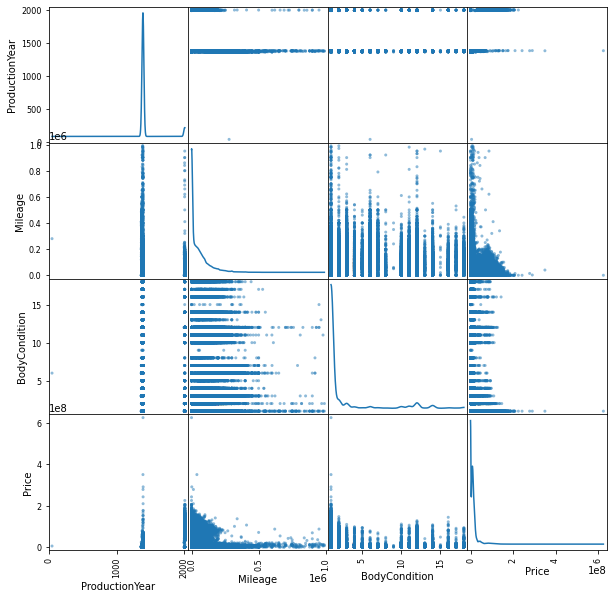

In [50]:
pd.plotting.scatter_matrix(data[['Company', 'Model', 'Detail', 'ProductionYear', 'Mileage',
       'BodyCondition', 'Price']], diagonal="kde",figsize=(10,10))
plt.show()


Principal Component Analysis(PCA)

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set.

To carry out a principal component analysis (PCA) on a multivariate data set, the first step is often to standardise the variables under study using the scale() function

because PCA is for numerical data and in our case most of the datas are categorical so we do not use PCA.

Correspondence Analysis

CA is a visualisation technique that can be applied to categorical data for data exploration. Unlike numerical data, categorical features are harder to analyse and visualise. CA uses a matrix decomposition method, namely SVD, and thus you may see CA being likened to the Principle Components Analysis (PCA). However, CA is not, strictly speaking, a PCA for categorical data, mostly because the primary objective of CA is to provide a visualisation of associations among categorical features

In [51]:
mca_cols = data.select_dtypes('object').columns


In [52]:
mca_cols

Index(['Company', 'Model', 'Detail'], dtype='object')

In [53]:
# instantiate MCA class
mca = prince.MCA(n_components = 2)

# get principal components
mca = mca.fit(data[mca_cols])

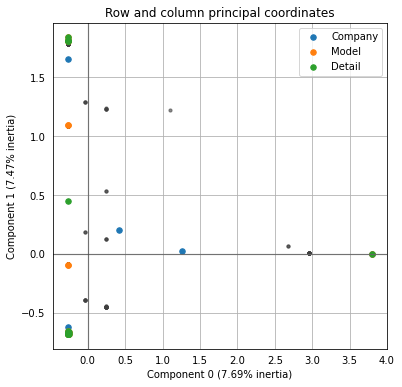

In [54]:
# project categories onto mca copmonents
# implicitly calls transform(X)
# what we want to see is for the points belonging to the same color to be as far apart as possible, for all colors
ax = mca.plot_coordinates(data[mca_cols])


# Data Preprocessing:


In [37]:
#Standardization is a very important concept in feature scaling which is an integral part of feature engineering. 
#When you collect data for data analysis or machine learning, we will be having a lot of features, 
#which are independent features. With the help of the independent features, 
#we will try to predict the dependent feature in supervised learning. 
#While seeing the data if you see there will be more noise in the data 
#which will put the model at risk of being influenced by the outliers. 
#So for this, we will commonly normalize or standardize the data.

        1- Remove Irrelevant Data (Elements that are not useful you'll need to remove as they add nothing to your data.)


In [38]:
#acording to the line 28 we saw thatprice has a weak correlation to mileage and bodycondition but correlated with date and 
#productionyear and we know that ID is not important 

In [46]:
data.columns

Index(['ID', 'Date', 'Company', 'Model', 'Detail', 'ProductionYear', 'Mileage',
       'BodyCondition', 'Price'],
      dtype='object')

In [11]:
data=data.drop(['ID'],axis=1)

        2- Remove Deduplicate (Duplicates will inevitably skew your data and/or confuse your results.)


In [12]:
data = data.drop_duplicates()


In [13]:
data.shape

(160033, 10)

In [14]:
#as we see in pandas profile report, we do not have any duplication in data

        3- Fix Structural Errors(Typos, Inconsistent Capitalization, ...)


In [15]:
data.head()

Company Model Detail  ProductionYear   Mileage  BodyCondition  \
123921     C-3  M-10    D-5          1388.0       0.0            1.0   
147069     C-4   M-4   D-14          1378.0  190000.0            3.0   
107111     C-4  M-12    D-8          1388.0       0.0            1.0   
162275     C-4  M-12    D-7          1374.0  300000.0           12.0   
151984     C-4   M-8   D-16          1379.0  110000.0            4.0   

            Price  Year  Month  Day  
123921  3843509.0  2010      1    2  
147069  2999812.0  2010      1    2  
107111  7280794.0  2010      1    2  
162275  2499843.0  2010      1    2  
151984  4280982.0  2010      1    2

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160033 entries, 123921 to 106024
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Company         160033 non-null  object 
 1   Model           160033 non-null  object 
 2   Detail          160033 non-null  object 
 3   ProductionYear  160033 non-null  float64
 4   Mileage         160033 non-null  float64
 5   BodyCondition   160033 non-null  float64
 6   Price           160033 non-null  float64
 7   Year            160033 non-null  int64  
 8   Month           160033 non-null  int64  
 9   Day             160033 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 13.4+ MB


In [17]:
#as we see in the head categorical datas are cpitalized so we can apply a capital to all
#of them to be shure that all of them are the same.and in info we see that date column type is int 
#and we can convert it to float

In [18]:
data['Company']=data['Company'].apply(lambda x: x.upper()) 
data['Model']=data['Model'].apply(lambda x: x.upper())
data['Detail']=data['Detail'].apply(lambda x: x.upper())


In [19]:
data['BodyCondition']=data['BodyCondition'].apply(lambda x:int(x))
data['ProductionYear']=data['ProductionYear'].apply(lambda x:int(x))
data['Year']=data['Year'].apply(lambda x:str(x))


In [20]:
# as we saw in profiler report we have a irrelevent data in productionyear
data=data.drop(data[data['ProductionYear']==40].index,axis=0)

In [21]:
data['Price']=data['Price'].replace(0,data['Price'].mean())
data['Mileage']=data['Mileage'].replace(0,data['Mileage'].mean())

        5- Outliers (Boxplots, Z-score, IQR, ...)


The interquartile range method defines outliers as values larger than Q3 + 1.5 * IQR or the values smaller than Q1 – 1.5 * IQR.

In [ ]:
#we use boxplot for numerical data in this case it is price and for outliers we shold use scaling to fix 

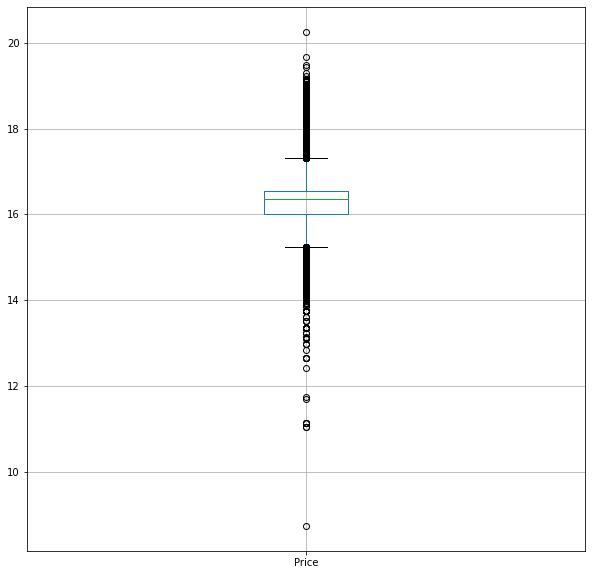

In [191]:
data.boxplot(column=['Price'],figsize=(10,10))
plt.grid(False)


In [22]:
data[['Price','Mileage']] = np.log(abs(data[['Price','Mileage']]))

In [23]:
data.head()

Company Model Detail  ProductionYear    Mileage  BodyCondition  \
123921     C-3  M-10    D-5            1388  10.894812              1   
147069     C-4   M-4   D-14            1378  12.154779              3   
107111     C-4  M-12    D-8            1388  10.894812              1   
162275     C-4  M-12    D-7            1374  12.611538             12   
151984     C-4   M-8   D-16            1379  11.608236              4   

            Price  Year  Month  Day  
123921  15.161896  2010      1    2  
147069  14.914060  2010      1    2  
107111  15.800750  2010      1    2  
162275  14.731738  2010      1    2  
151984  15.269693  2010      1    2

        6- Categorical Features (One-hot, Binary, Frequency, Label ,Ordinal, ...)


In [24]:
#in order to have accurate observation we should convert categorical data to numeric

In [25]:
dt=data[['Company','Model','Detail','ProductionYear','Year']]

In [26]:
dt=dt.apply(LabelEncoder().fit_transform)

In [27]:
data=data.drop(['Company','Model','Detail','ProductionYear','Year'], axis='columns')

In [28]:
data = pd.concat([dt, data], axis='columns')

In [29]:
data.head()

Company  Model  Detail  ProductionYear  Year    Mileage  \
123921        2      1      14              27     0  10.894812   
147069        3     12       5              17     0  12.154779   
107111        3      3      17              27     0  10.894812   
162275        3      3      16              13     0  12.611538   
151984        3     16       7              18     0  11.608236   

        BodyCondition      Price  Month  Day  
123921              1  15.161896      1    2  
147069              3  14.914060      1    2  
107111              1  15.800750      1    2  
162275             12  14.731738      1    2  
151984              4  15.269693      1    2

In [30]:
#data types,along with finding whether they contain null values or not.
#Data has only float values.
#No variable column has null/missing values.

In [ ]:
# we used stats.zscore this is the Feature Transformation

In [ ]:
# we extract time data to year month and date this is the Feature Extraction

In [ ]:
# we delete the ID column because it was irrelevant so we used Feature Selection

# conclusion

In [ ]:
# as we see in the above cells EDA can help us to better understand the data so this can help better decition making.
# the EDA step is used in every data-driven projects such as BI projects or machine learning projects. for example
# in machine learning projects it helps us in model selection step because every model is suitable for specific features,
# for example in cases that we have correlated data the decision tree based models are the best or if features are independent
# we should use regression models for prediction.

# so in our dataset we see correlation between features so if we want to predict the price we should use tree based models.


# Discussing the comparison and Improvements

We could use more scatter plots to compare the various characteristics in order to get a clearer mental picture of the situation and a deeper comprehension of the facts. Comparing our research to one of the case studies that was published in the academic literature (a case study involving students in a programming class), we used more tools, such as pandas profiler, which provided us with a great understanding of the data and helped us interpret all of the correlations that existed between the features. Additionally, by making use of scatterplots in our case, we were able to find a good understanding of the features' relation to one another.

# refrences


[1] Mosteller F, Tukey JW (1977) Data analysis and regression. Addison-Wesley Pub. Co., Boston

[2] https://www.kaggle.com/datasets/farhad67/car-price

[3] Hill T, Lewicki P (2006) Statistics: methods and applications: a comprehensive reference for science, industry, and data mining. StatSoft, Inc., Tulsa

